# ADA - Project Milestone P2
The jupyter notebook presenting our initial results.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#
from convertTxtToCSV import txt_to_csv_prog

In [94]:
# general helpers
def ratio_to_percentage(ratio):
    """
    
    :param ratio: a number between 0 and 1
    :return: the corresponding percentage with two decimal places
    """
    return round(ratio * 100, 2)

In [95]:
df_ba_users = pd.read_csv("data/BeerAdvocate/users.csv")
df_rb_users = pd.read_csv("data/RateBeer/users.csv")

# Filtering

In [96]:


exp_threshold = 15

df_ba_experienced_users = df_ba_users[df_ba_users["nbr_ratings"] > exp_threshold]
df_rb_experienced_users = df_rb_users[df_rb_users["nbr_ratings"] > exp_threshold]

In [97]:
num_users_ba = len(df_ba_users)
num_exp_users_ba = len(df_ba_experienced_users)
num_users_rb = len(df_rb_users)
num_exp_users_rb = len(df_rb_experienced_users)

perc_ba = 100 - ratio_to_percentage(num_exp_users_ba / num_users_ba)
print("By filtering the datasets, we lost " + str(perc_ba) + "% (" + str(num_users_ba - num_exp_users_ba) + "/" + str(num_users_ba) + ")" + " of the beer advocate dataset")

perc_rb = 100 - ratio_to_percentage(num_exp_users_rb / num_users_rb)
print("By filtering the datasets, we lost " + str(perc_rb) + "% (" + str(num_users_rb - num_exp_users_rb) + "/" + str(num_users_rb) + ")" + " of the rate beer dataset")

perc_both = round((num_users_ba / (num_users_ba + num_users_rb)) * perc_ba + (num_users_rb  / (num_users_rb + num_users_ba)) * perc_rb, 2)
print("Taking both datasets in account we lost " + str(perc_both) + "% (" + str(num_users_ba + num_users_rb - num_exp_users_ba - num_exp_users_rb) + "/" + str(num_exp_users_ba + num_users_rb) + ")" + " of the users")

By filtering the datasets, we lost 74.84% (115025/153704) of the beer advocate dataset
By filtering the datasets, we lost 80.22% (56295/70174) of the rate beer dataset
Taking both datasets in account we lost 76.53% (171320/108853) of the users


# Does the reviewer's rating change over time

In [98]:
# 

# Patriotism and foreign beer

In [99]:
colors = ["#001219", "#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03"]

In [100]:
df_ba_users = pd.read_csv("data/BeerAdvocate/users.csv")
df_rb_users = pd.read_csv("data/RateBeer/users.csv")

In [101]:
print(len(df_ba_users)) 
print(len(df_rb_users))

153704
70174


We see that the beer advocate dataset has more than twice as many users so we'll go with that one for now.

In [102]:
# first we want to know: how many ratings where made from people in which country

Number of ratings overall:  7892754


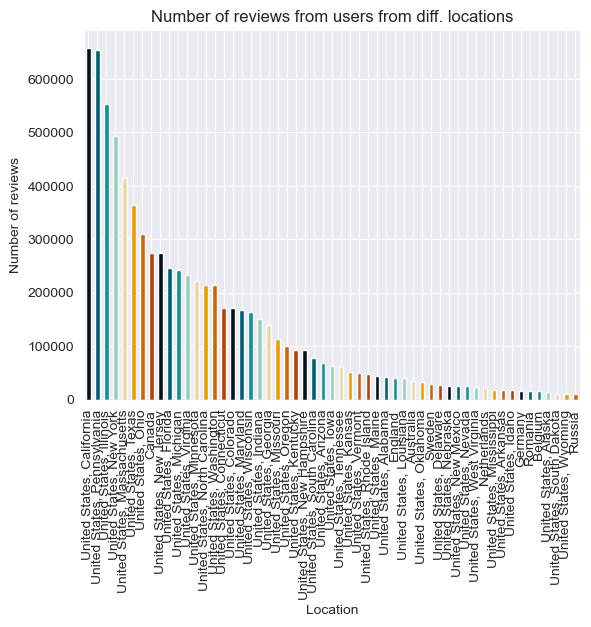

In [103]:
df_ba_grp_loc = df_ba_users.groupby("location")
df_ba_sum_rat = df_ba_grp_loc["nbr_ratings"].sum().sort_values(ascending=False)

print("Number of ratings overall: ", df_ba_sum_rat.sum())

df_ba_sum_rat_cutoff = df_ba_sum_rat[df_ba_sum_rat > 10000]

df_ba_sum_rat_cutoff.plot(kind="bar", color=colors[:len(df_ba_sum_rat_cutoff)])
plt.xlabel("Location")
plt.ylabel("Number of reviews")
plt.title("Number of reviews from users from diff. locations")

plt.show()

We can easily see that the US absolutely dominates this data set (as one could have expected).


How many ratings outside of the US:  588884


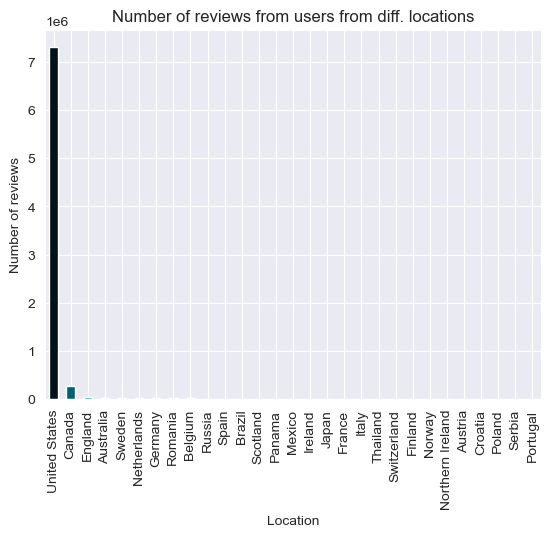

In [104]:
# let's look at the chart if we take the US as one country
df_ba_sum_rat_us = df_ba_sum_rat[df_ba_sum_rat.index.str.contains("United States, ")]
df_ba_sum_rat_us_as1 = df_ba_sum_rat[~df_ba_sum_rat.index.str.contains("United States, ")]
print("How many ratings outside of the US: ", df_ba_sum_rat_us_as1.sum())

df_ba_sum_rat_us_as1.loc["United States"] = df_ba_sum_rat_us.sum()

df_ba_sum_rat_us_as1_cutoff = df_ba_sum_rat_us_as1[df_ba_sum_rat_us_as1 > 2000].sort_values(ascending=False)

# plotting
df_ba_sum_rat_us_as1_cutoff.plot(kind="bar", color=colors[:len(df_ba_sum_rat_us_as1_cutoff)])
plt.xlabel("Location")
plt.ylabel("Number of reviews")
plt.title("Number of reviews from users from diff. locations")

plt.show()

In [105]:
print(df_ba_sum_rat["Canada"])

274512


Yeah, okay I already thought so...
We only have around half a million ratings from outside the US.
Overall there are 7,892,754 ratings. 
Of the 588,884 ratings from outside the US, 274512 (about the half) are from Canada.

So the big question is now do we also look at patriotism within the US or not.


Maybe let's look at the situation for the other data sst.

Number of ratings overall:  7415683


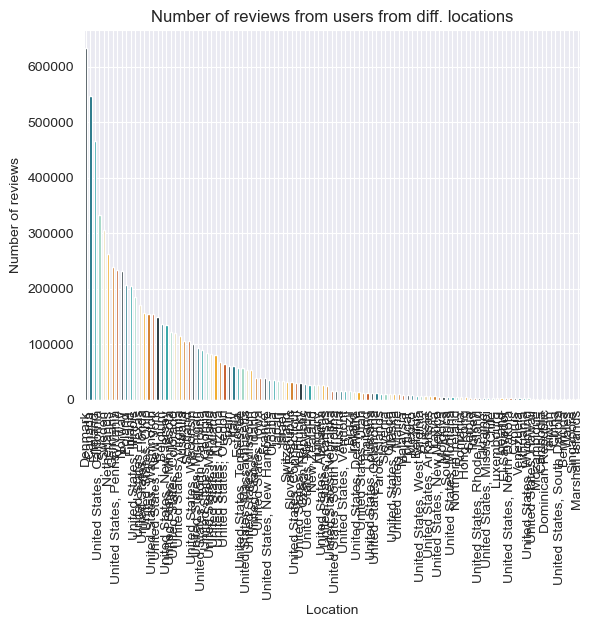

In [106]:
df_rb_grp_loc = df_rb_users.groupby("location")
df_rb_sum_rat = df_rb_grp_loc["nbr_ratings"].sum().sort_values(ascending=False)

print("Number of ratings overall: ", df_rb_sum_rat.sum())

df_rb_sum_rat_cutoff = df_rb_sum_rat[df_rb_sum_rat > 1000]

df_rb_sum_rat_cutoff.plot(kind="bar", color=colors[:len(df_rb_sum_rat_cutoff)])
plt.xlabel("Location")
plt.ylabel("Number of reviews")
plt.title("Number of reviews from users from diff. locations")

plt.show()

How many ratings outside of the US:  4141064


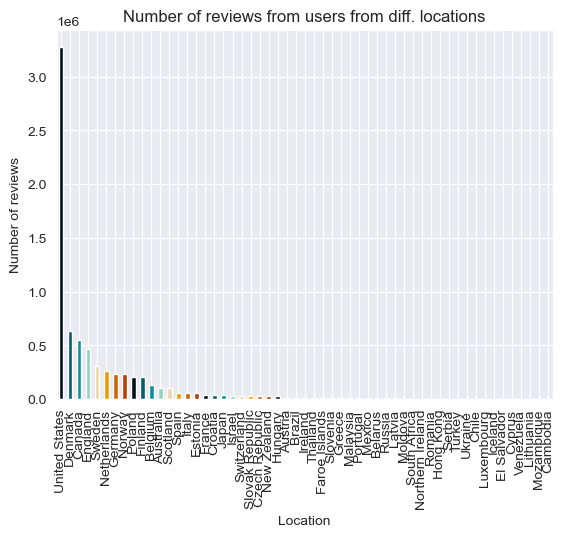

In [107]:
# let's look at the chart if we take the US as one country
df_rb_sum_rat_us = df_rb_sum_rat[df_rb_sum_rat.index.str.contains("United States, ")]
df_rb_sum_rat_us_as1 = df_rb_sum_rat[~df_rb_sum_rat.index.str.contains("United States, ")]
print("How many ratings outside of the US: ", df_rb_sum_rat_us_as1.sum())

df_rb_sum_rat_us_as1.loc["United States"] = df_rb_sum_rat_us.sum()

df_rb_sum_rat_us_as1_cutoff = df_rb_sum_rat_us_as1[df_rb_sum_rat_us_as1 > 2000].sort_values(ascending=False)

# plotting
df_rb_sum_rat_us_as1_cutoff.plot(kind="bar", color=colors[:len(df_rb_sum_rat_us_as1_cutoff)])
plt.xlabel("Location")
plt.ylabel("Number of reviews")
plt.title("Number of reviews from users from diff. locations")

plt.show()

In [108]:
print(df_rb_sum_rat["Canada"])

546493


So the first thing we notice is, that although the beer advocate dataset has way more users, the rate beer dataset actually has a kind of similar number of ratings.
Also (what's really good for the purpose of pur analysis), more than half of the data is not from people from the US.
So I will probably got with the rate beer data for now.

In [109]:
print("Number of ratings from people from Cambodia: ", df_rb_sum_rat_us_as1_cutoff["Cambodia"])
print("Number of people from Cambodia: ", df_rb_users[df_rb_users["location"] == "Cambodia"]["user_id"].count())
print(df_rb_users[df_rb_users["location"] == "Cambodia"])

Number of ratings from people from Cambodia:  2090
Number of people from Cambodia:  10
       nbr_ratings  user_id      user_name        joined  location
912              1   414574         Makewa  1.464170e+09  Cambodia
947              2    86385           Xiem  1.232881e+09  Cambodia
1006          1257   163090      WheatKing  1.331377e+09  Cambodia
4743           823    69821         502Che  1.203160e+09  Cambodia
27538            2   115173         rnolst  1.287050e+09  Cambodia
27547            1   104977  peterbrongers  1.271671e+09  Cambodia
27549            1   115185  Mekongseagull  1.287137e+09  Cambodia
27550            1   115182         Mayhem  1.287137e+09  Cambodia
27551            1   115178        basspro  1.287137e+09  Cambodia
27553            1   115180      blutotofu  1.287137e+09  Cambodia


Okay, the last country still shown in the cutoff data has around 2000 ratings from 10 people there.
I thinks this should be okay...
Especially because basically all of them are from the same two alcoholics.

So I will use the data with the cutoff from now on.

Next up, let's try to get some findings on the average grader of users from each country.

Actually the first thing we might do is check whether the number of ratings given in the user.csv correlates with the number of ratings we find in the actual ratings.csv.

In [110]:
# df_rb_grp_loc   # user id we want to check: 175852
print(df_rb_users[df_rb_users["user_id"] == 175852]["nbr_ratings"])

# load the ratings.csv created from the txt but without the text column for efficiency reasons (don't need that for now)

df_rb_ratings = pd.read_csv("data/RateBeer/ratings/ratings.csv", usecols=lambda col: col != "text")

0    1890
Name: nbr_ratings, dtype: int64


In [111]:
df_rb_ratings.head()
print(len(df_rb_ratings))

7122074


In [112]:
print(len(df_rb_ratings[df_rb_ratings["user_id"] == 175852]))

1612


Damn it... why did I know this would happen...

Anyway, let's work with what we've got...

In [113]:
# joining the ratings df with the users df
df_rb_users_ratings_via_id = df_rb_ratings.merge(df_rb_users, on=["user_id"], how="inner")
len(df_rb_users_ratings_via_id)  #7415683 


7123783

Okay, wait, now I'm a bit confused.
When we iterate over all users in the users.csv file and sum up the nbr_ratings, we get:
7415683

In contrast, when we count the entries in ratings.csv, we get:
7122074
(which at least aligns with the fact that we found fewer entries in ratings.csv for one user than indicated in their row in users.csv).

However, when we perform an inner join with users.csv, surprisingly, we get a higher count again:
7123783

This basically leads us to the conclusion that the user_id in users.csv is not unique.
Let’s test that:

In [114]:
df_rb_users["user_id"].duplicated().any()

True

Oh no

In [115]:
duplicates = df_rb_users[df_rb_users['user_id'].duplicated(keep=False)]
print("Non unique values:", duplicates["user_id"])

Non unique values: 1176      46797
2624      46797
4902      46797
8099      46797
15105      3070
18057     46797
18993     46797
23055     46797
23171     46797
23202     46797
25391     46797
25563     46797
25904     46797
27056     46797
27596     46797
31550     46797
33178     46797
33798     46797
39965     46797
40043     46797
40166     46797
40317      3070
40757      3070
42643    437916
44156    427060
44420     46797
44862     46797
49379     46797
49388     46797
51178    437916
51330     23090
51520     65919
52109     46797
52132     65919
52625      3070
53856     46797
53857     46797
54325     46797
55743      3070
56435     23090
60943     46797
61158     46797
61233    427060
61633     46797
62428    437916
64982     46797
64995     46797
65019     46797
65382     46797
65923     46797
66116     46797
66686     46797
67096     46797
67389    427060
67390    427060
67551     46797
67824    427060
67957     46797
68271    427060
69069     65919
Name: user_id, dtype:

I don't like this situation.
Let's test whether the user_name is unique

In [116]:
df_rb_users["user_name"].duplicated().any()

False

Okay wow... the user_id is duplicated sometimes but the user name is not...


In [117]:
df_rb_users_ratings = df_rb_ratings.merge(df_rb_users, on=["user_name"], how="inner")
len(df_rb_users_ratings)  

7122071

Okay this is just 3 less than the length of the ratings.csv.
Let's look at the 3 ratings with user_names that are not in the users.csv:

In [118]:
df_rb_ratings[~df_rb_ratings["user_name"].isin(df_rb_users["user_name"])]

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating
3745886,Other Half Forever Simcoe - Double Dry Hopped,474417,Other Half Brewing,18293,Imperial IPA,8.5,1497434400,"(5)</A></I> - , Connecticut, USA - JUN 17, 201...",65919,4,8,4,9,18,4.3
3828027,Blue Moon Belgian White Ale,2228,Blue Moon Brewing Company &#40;MillerCoors&#41;,29144,Witbier,5.4,1497780000,"(5)</A></I> - , Connecticut, USA - JUN 18, 201...",65919,3,7,4,7,16,3.7
6901786,Stella Artois,1478,InBev Belgium,260,Pale Lager,5.2,1497693600,"(5)</A></I> - , Connecticut, USA - JUN 18, 201...",65919,4,6,3,8,16,3.7


Ah yes okay, interesting name haha.

The only thing that is still irritating is, that the count over all nbr_ratings in the user.csv gave a higher number of ratings than the length of the ratings.csv.
However, it’s possible that a few ratings may not be included in the ratings.csv file. Additionally, the overall difference isn’t too drastic, and in the end, we chose the table with fewer entries, which is less likely to contain duplicates if any exist. So let’s continue from here.

In [119]:
# creating a user df where all US countries are juts US
mask = df_rb_users['location'].str.contains("United States, ", na=False)
df_rb_users_us = df_rb_users
df_rb_users_us.loc[mask, 'location'] = "United States"

#df_rb_users_cutoff = df_rb_users_us[df_rb_users_us["location"].isin(df_rb_sum_rat_us_as1_cutoff.index.values)]

df_rb_users_ratings = df_rb_ratings.merge(df_rb_users_us, on=["user_name"], how="inner")

print(df_rb_users_ratings.head())
print("Maximal possible rating: ", df_rb_users_ratings["rating"].max())
print("Minimal possible rating: ", df_rb_users_ratings["rating"].min())

             beer_name  beer_id brewery_name  brewery_id       style  abv  \
0    33 Export (Gabon)   410549      Sobraga        3198  Pale Lager  5.0   
1  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
2  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
3  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   
4  Castel Beer (Gabon)   105273      Sobraga        3198  Pale Lager  5.2   

         date     user_name  user_id_x  appearance  aroma  palate  taste  \
0  1461664800       Manslow     175852           2      4       2      4   
1  1487329200  MAGICuenca91     442761           2      3       2      4   
2  1466762400        Sibarh     288889           3      3       2      3   
3  1451646000       fombe89     250510           4      3       1      2   
4  1445594400    kevnic2008     122778           2      4       2      4   

   overall  rating  nbr_ratings  user_id_y        joined location  
0        8  

In [122]:
# we need a cutoff so the charts stay readable
# I decided to take the 50 countries with the most ratings from people from that country
top50 = df_rb_users_ratings["location"].value_counts().head(50)
used_countries = top50.index

df_rb_users_ratings = df_rb_users_ratings[df_rb_users_ratings["location"].isin(used_countries)]

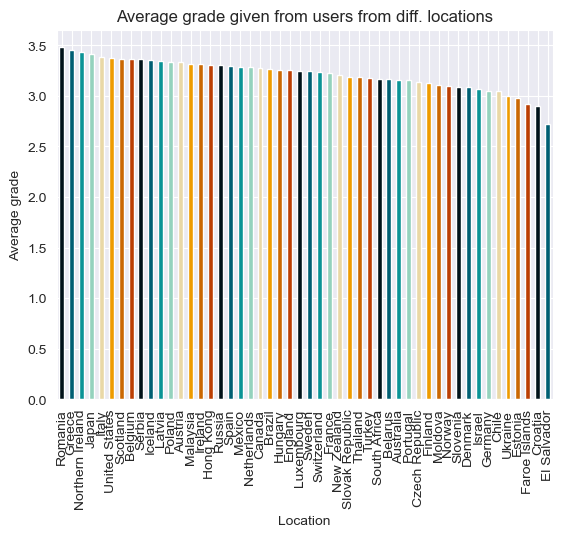

In [125]:
# the mean rating from users from the top 50 countries
df_plot = df_rb_users_ratings.groupby("location")["rating"].mean().sort_values(ascending=False)

# plotting
df_plot.plot(kind="bar", color=colors[:len(df_plot)])
plt.xlabel("Location")
plt.ylabel("Average grade")
plt.title("Average grade given from users from diff. locations")

plt.show()

I can easily imagine that the trends come from the edges of countries where very few ratings were submitted. So let's quickly check that.

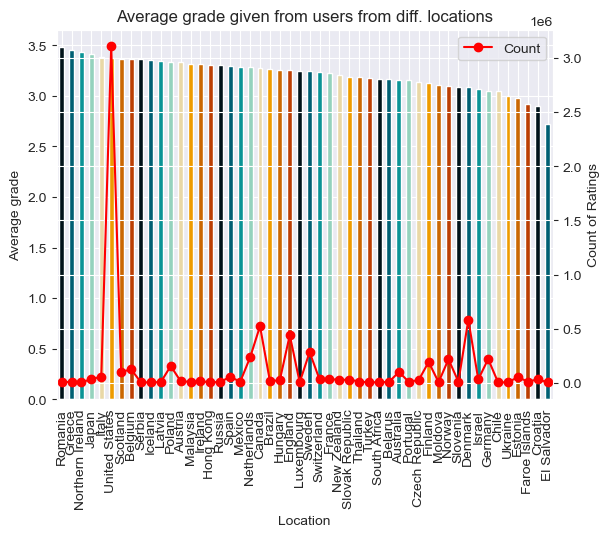

In [126]:
# the mean rating from users from the top 50 countries
df_plot = df_rb_users_ratings.groupby("location")["rating"].mean().sort_values(ascending=False)
fig, ax1 = plt.subplots()  # need subplots for barchart and line chart showing number of ratings from that country
# plotting the bar chart
df_plot.plot(kind="bar", color=colors[:len(df_plot)], ax=ax1)
ax1.set_xlabel("Location")
ax1.set_ylabel("Average grade")
ax1.set_title("Average grade given from users from diff. locations")
# plotting the line
ax2 = ax1.twinx() # second axis for the number of ratings from that country
top50_counts = top50[df_plot.index] # bring top50 in right order
ax2.plot(df_plot.index, top50_counts, color="red", marker="o", linestyle="-", label="Count")
ax2.set_ylabel("Count of Ratings")
ax2.legend(loc="upper right")
plt.show()


Okay no, nevermind that actually seems to be at least a little bit interesting.

Okay, after all these general analyses, let’s get to one of the questions that actually interests us: What proportion of the reviews are for beers from the same country, and what proportion are for beers from other countries?

In [148]:
# we need to join with the brewery data set to get the information where the beer comes from

df_brew = pd.read_csv("./data/RateBeer/breweries.csv")
df_brew.rename(columns={"id": "brewery_id", "location": "brewery_location"}, inplace=True)

# change the us states to us again
mask2 = df_brew['brewery_location'].str.contains("United States", na=False)
df_brew_us = df_brew
df_brew_us.loc[mask2, 'brewery_location'] = "United States"

df_rb_users_ratings_brew = df_rb_users_ratings.merge(df_brew_us[["brewery_id", "brewery_location"]], how="inner")
df_rb_users_ratings_brew.rename(columns={"location": "user_location"}, inplace=True)
df_rb_users_ratings_brew.head(10)

13352    United States, Georgia
Name: brewery_location, dtype: object
True


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id_x,appearance,aroma,palate,taste,overall,rating,nbr_ratings,user_id_y,joined,user_location,brewery_location
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,1890,175852,1.337508e+09,Poland,Gabon
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,89,442761,1.484046e+09,Spain,Gabon
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,169,288889,1.384600e+09,Poland,Gabon
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,3371,250510,1.363950e+09,Spain,Gabon
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,13043,122778,1.296644e+09,Germany,Gabon
5,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1444644000,Beerhunter111,227834,2,3,2,3,9,1.9,21024,227834,1.352718e+09,Germany,Gabon
6,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1444212000,Erzengel,83106,4,5,4,5,8,2.6,8781,83106,1.224324e+09,Germany,Gabon
7,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1430820000,Manslow,175852,2,4,2,3,6,1.7,1890,175852,1.337508e+09,Poland,Gabon
8,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1401357600,Lowenbrau,37316,3,5,2,3,7,2.0,4051,37316,1.147860e+09,Spain,Gabon
9,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1374141600,seynie,75452,2,3,3,4,6,1.8,435,75452,1.211278e+09,Belgium,Gabon


In [149]:
# we add a boolean column checking whether the brewery_location = user_location

df_rb_users_ratings_brew["foreign"] = df_rb_users_ratings_brew["user_location"] != df_rb_users_ratings_brew["brewery_location"]
df_rb_users_ratings_brew.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id_x,appearance,...,palate,taste,overall,rating,nbr_ratings,user_id_y,joined,user_location,brewery_location,foreign
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,...,2,4,8,2.0,1890,175852,1.337508e+09,Poland,Gabon,True
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,...,2,4,8,1.9,89,442761,1.484046e+09,Spain,Gabon,True
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,...,2,3,5,1.6,169,288889,1.384600e+09,Poland,Gabon,True
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,...,1,2,5,1.5,3371,250510,1.363950e+09,Spain,Gabon,True
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,...,2,4,7,1.9,13043,122778,1.296644e+09,Germany,Gabon,True


Now we can find out the proportion of ratings that are about foreign beers

In [150]:
foreign_beers = df_rb_users_ratings_brew[df_rb_users_ratings_brew["foreign"] == True]
own_beers = df_rb_users_ratings_brew[df_rb_users_ratings_brew["foreign"] == False]

print("Number of ratings about foreign beers: ", len(foreign_beers))
print("Number of ratings about beers from user's country: ", len(own_beers))

print("That means " + str(ratio_to_percentage(len(foreign_beers) / len(df_rb_users_ratings_brew))) + "% are foreign beers and")
print(str(ratio_to_percentage(len(own_beers) / len(df_rb_users_ratings_brew))) + "% are beers from the user's country.")

Number of ratings about foreign beers:  3145912
Number of ratings about beers from user's country:  3739510
That means 45.69% are foreign beers and
54.31% are beers from the user's country.


This cell is here because I did a stupid error and was irritated for longer than necessary.
Anyway lets look at the results per country

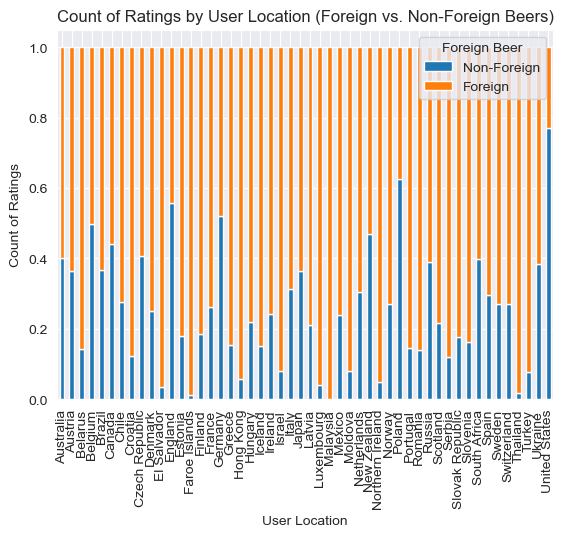

In [152]:
# grouping
df_grouped_counts = df_rb_users_ratings_brew.groupby(["user_location", "foreign"]).size().unstack(fill_value=0)
# scaling the counts so all the bars are of the same size
df_grouped_counts = df_grouped_counts.div(df_grouped_counts.sum(axis=1), axis=0)

# plotting
df_grouped_counts.plot(kind="bar", stacked=True)
plt.xlabel("User Location")
plt.ylabel("Count of Ratings")
plt.title("Count of Ratings by User Location (Foreign vs. Non-Foreign Beers)")
plt.legend(title="Foreign Beer", labels=["Non-Foreign", "Foreign"])
plt.show()

Okay, after finding and fixing my silly mistake, the results confirm what I had suspected. In the USA, people primarily drink or review domestic beers, while users from nearly all other countries mostly review foreign beers. For Germany, it’s roughly 50/50.